In [2]:
from frechet_fda.data_generation_helpers import (
    gen_params_scenario_one,
    make_truncnorm_pdf,
)
from frechet_fda.distribution_tools import (
    get_optimal_range,
    make_distribution_objects,
)
from frechet_fda.fda_funcs import (
    compute_centered_data,
    compute_cov_function,
    compute_fpc_scores,
    compute_principal_components,
)

In [3]:
# Set parameters
n = 200
grid_size = 10000
trunc = 3
mus, sigmas = gen_params_scenario_one(n)
# Sort sigmas, because when summing Distribution instances something goes wrong
sigmas.sort()

In [4]:
# Generate pdfs within truncation points
pdfs = make_truncnorm_pdf(-trunc, trunc, mus, sigmas, grid_size=grid_size)
# Make Distribution class objects
my_pdfs = make_distribution_objects(pdfs)
my_cdfs = [pdf.integrate() for pdf in my_pdfs]
my_qfs = [cdf.invert() for cdf in my_cdfs]
my_qdfs = [qf.differentiate() for qf in my_qfs]
# For numerical correction: shorten the range for smaller sigmas to get rid of
# numerical artifacts when computing integrals, derivatives and means later
new_ranges = get_optimal_range(my_pdfs)
# Generate pdfs again, this time within individual ranges
pdfs2 = [
    make_truncnorm_pdf(
        new_ranges[i][0], new_ranges[i][1], mus[i], sigmas[i], grid_size=grid_size,
    )[0]
    for i in range(n)
]

C:\Coding\frechet_fda\src\frechet_fda\data_generation_helpers.py:73: UserWarning: Not all provided densities integrate to 1 with tolerance 1e-05!
 Max case of deviation is: 0.00045380448286858055
 In position: 199
 Performing normalization...
  warnings.warn(
C:\Coding\frechet_fda\src\frechet_fda\numerics_helpers.py:36: RuntimeWarning: divide by zero encountered in divide
  d_y[:-1] = np.diff(y_vals) / np.diff(d_x)
C:\Coding\frechet_fda\src\frechet_fda\data_generation_helpers.py:73: UserWarning: Not all provided densities integrate to 1 with tolerance 1e-05!
 Max case of deviation is: 1.0512038445709138e-05
 In position: 0
 Performing normalization...
  warnings.warn(
C:\Coding\frechet_fda\src\frechet_fda\data_generation_helpers.py:73: UserWarning: Not all provided densities integrate to 1 with tolerance 1e-05!
 Max case of deviation is: 1.1517970267327371e-05
 In position: 0
 Performing normalization...
  warnings.warn(
C:\Coding\frechet_fda\src\frechet_fda\data_generation_helpers.py:

In [5]:
# Generate all the distribution objects
new_pdfs = make_distribution_objects(pdfs2)
new_cdfs = [pdf.integrate() for pdf in new_pdfs]
new_qfs = [cdf.invert() for cdf in new_cdfs]
new_qdfs = [qf.differentiate() for qf in new_qfs]

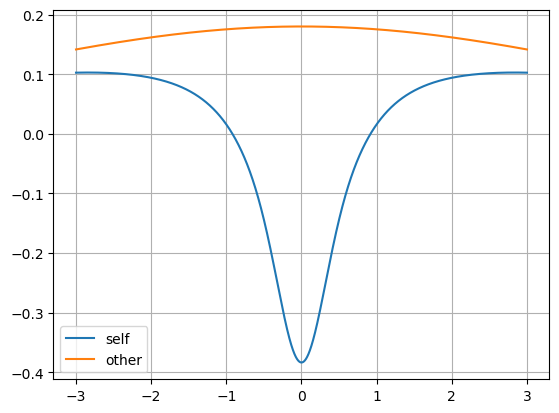

In [6]:
# Compute centered data, just to see whether it works
# One can clearly see how inappropriate it is to apply fda methods on densities
centered_pdfs = compute_centered_data(my_pdfs)
centered_pdfs[sigmas.argmax()].compare(my_pdfs[sigmas.argmax()])

In [7]:
covariance_function = compute_cov_function(centered_pdfs)

In [8]:
eigenvalues, eigenfunctions = compute_principal_components(
    my_pdfs[0].x, covariance_function,
)

In [15]:
lqdfs = [qdf.log() for qdf in my_qdfs]

In [16]:
thetas = [lqdf.exp().integrate(only_full_integral=True) for lqdf in lqdfs]
exponents = (-1) * [lqdf.compose(cdf) for lqdf, cdf in zip(lqdfs,new_cdfs)]

C:\Coding\frechet_fda\src\frechet_fda\numerics_helpers.py:21: RuntimeWarning: invalid value encountered in multiply
  integral[..., 1:] = np.cumsum(y_vals[..., :-1] * point_distance, axis = axis)


In [18]:
thetas

[array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.),
 array(6.)

In [17]:
[theta * exponent for theta, exponent in zip(thetas, exponents)]

[]

In [13]:
fpc_scores = compute_fpc_scores(my_pdfs[0].x, centered_pdfs, eigenfunctions)

In [14]:
def karhunen_loeve()

SyntaxError: expected ':' (713153624.py, line 1)